In [1]:
import numpy as np
%matplotlib widget
from matplotlib import pyplot as plt
from tqdm import tqdm
import torch as tc
import gen_comp_plot as gcp
from p_power import *
from project.blueprints.pyhton.msd_Dmom import *

%load_ext autoreload
%autoreload 2

Using device: cpu
Using device: cpu


In [2]:
A = tc.complex(tc.Tensor([[2, 1], [1, 2]]), tc.zeros(2, 2))
U = tc.complex(tc.Tensor([[1, 1], [1, -1]]), tc.zeros(2, 2)) / np.sqrt(2)
y = tc.complex(
    *[tc.normal(mean=tc.zeros((100,100)), std=1) for _ in range(2)]
).to(device)

print(y)

tensor([[ 1.8458+0.9698j,  1.1892+2.2614j,  1.0447-0.1865j,  ...,
         -1.4600+1.3035j,  1.1759-0.4681j,  1.2534+1.7290j],
        [ 1.2839-0.4519j,  0.7428-0.0781j,  0.7951-1.2280j,  ...,
          1.2733-0.1619j,  0.4035-1.7545j,  1.0419-1.3946j],
        [ 0.3796-0.0736j,  1.2446-1.1065j,  0.1593+1.0099j,  ...,
         -0.4724+0.7365j,  1.3025+1.2135j, -1.1428-1.2354j],
        ...,
        [ 0.6439-0.4894j,  0.2421+0.7611j, -1.1401-0.6468j,  ...,
         -1.2258+0.3144j,  1.9665+1.3042j,  0.9617-1.5276j],
        [ 0.7062+0.6805j, -0.2575-0.5691j, -0.3394+0.0979j,  ...,
          0.2566-1.3716j, -1.0042-0.7460j,  1.1898+1.5129j],
        [ 1.2543-0.9847j,  1.9876-1.0197j, -0.9422-0.0491j,  ...,
          0.1226+1.0419j, -1.0543+0.2219j,  0.5019+0.4766j]])


100%|██████████| 40/40 [00:05<00:00,  7.59it/s]


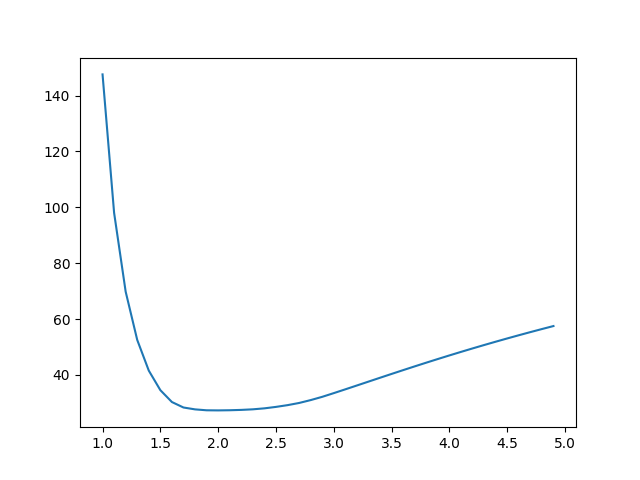

C:\Users\jackg\AppData\Local\Temp\ipykernel_30596\1505376266.py:7: RuntimeWarning: divide by zero encountered in divide
  qs = 1 - 1 / (1 - ps)


In [3]:
ps = np.arange(1, 5, 0.1)
norms = [p_power(y, p, s_max=100)[0] for p in tqdm(ps)]
norms = [n if n==0 else n.item() for n in norms]
figure1 = plt.figure(1)
plt.plot(ps, norms)
plt.show()
qs = 1 - 1 / (1 - ps)
# plt.plot(ps, np.maximum(2**(1/ps), 2**(1/ps)), linestyle='--', linewidth=2)
# plt.show()

  0%|          | 0/40 [00:00<?, ?it/s]c:\Users\jackg\OneDrive - UCB-O365\Documents\!prjs\smoooooothOperatorrr\project\blueprints\pyhton\max_sim_diag.py:27: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at ..\aten\src\ATen\native\Copy.cpp:300.)
  converged = tc.zeros(s_max_diag, 1, 1, 1, dtype=tc.cfloat).to(device).bool()
100%|██████████| 40/40 [00:38<00:00,  1.05it/s]


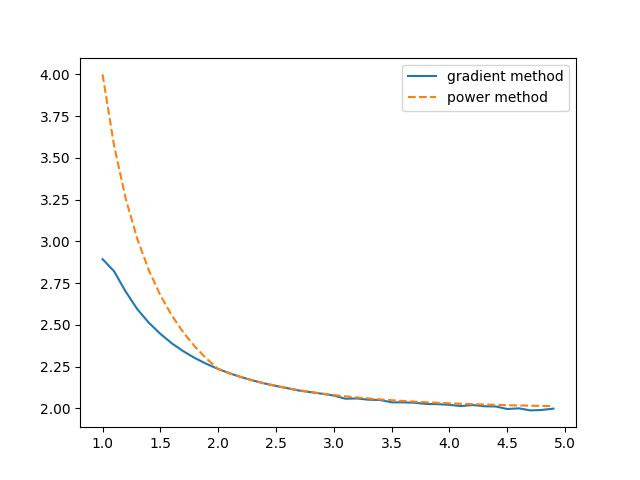

In [4]:
figure2 = plt.figure()
ps = np.arange(1, 5, 0.1)
norms = [max_sim_diag(A, U, p) for p in tqdm(ps)]
b, a = zip(*norms)
b = [x.item() for x in b]
a = [x.item() for x in a]
plt.plot(ps, b, label='gradient method')
plt.plot(ps, a, label='power method', linestyle='--')
plt.legend()
# qs = 1 - 1 / (1 - ps)
# plt.plot(ps, np.maximum(2**(1/ps), 2**(1/ps)), linestyle='--', linewidth=2)
plt.show()

In [5]:
max_sim_diag(A, U, 1.1)

(tensor(2.8147), tensor([[[3.5722]]]))

In [6]:
tc.linalg.matrix_norm(y, ord=2)

tensor(27.3326)

In [7]:
dual(y, p=2, dim=1)**2

tensor([[ 0.0139+0.0202j, -0.0209+0.0303j,  0.0060-0.0022j,  ...,
          0.0024-0.0214j,  0.0066-0.0062j, -0.0080+0.0244j],
        [ 0.0073-0.0058j,  0.0027-0.0006j, -0.0044-0.0098j,  ...,
          0.0080-0.0021j, -0.0147-0.0071j, -0.0043-0.0146j],
        [ 0.0007-0.0003j,  0.0015-0.0131j, -0.0047+0.0015j,  ...,
         -0.0015-0.0033j,  0.0011+0.0150j, -0.0010+0.0134j],
        ...,
        [ 0.0008-0.0028j, -0.0023+0.0016j,  0.0039+0.0065j,  ...,
          0.0062-0.0034j,  0.0096+0.0228j, -0.0063-0.0130j],
        [ 0.0002+0.0058j, -0.0015+0.0018j,  0.0006-0.0004j,  ...,
         -0.0109-0.0042j,  0.0027+0.0090j, -0.0052+0.0216j],
        [ 0.0033-0.0133j,  0.0157-0.0219j,  0.0048+0.0005j,  ...,
         -0.0058+0.0014j,  0.0057-0.0025j,  0.0001+0.0026j]])

In [8]:
range(2)

range(0, 2)

In [9]:
dim=1
val, ind = y.abs().max(dim=dim, keepdim=True)
range_shape = [1 for _ in range(len(y.shape))]
range_shape[dim] = -1
y_dual = 0 * y
y_dual[tc.arange(y.shape[dim]).reshape(range_shape) == ind] = val.sgn().flatten()
#y_dual[tc.arange(y.shape[dim]).reshape(range_shape) == ind] = tc.sgn(val)

RuntimeError: Index put requires the source and destination dtypes match, got ComplexFloat for the destination and Float for the source.

In [ ]:
y_dual

tensor([[0., 0., 1.],
        [1., -0., -0.]])

In [ ]:
B = tc.randint(0, 4, size=(1, 4, 2, 2))

In [ ]:
B.transpose(1, 2).flatten(2, 3)

tensor([[[1, 3, 2, 3, 2, 1, 2, 2],
         [1, 3, 3, 2, 1, 0, 3, 2]]])

In [ ]:
B[0,1]

tensor([[2, 3],
        [3, 2]])

In [ ]:
1 / tc.Tensor([np.inf])

tensor([0.])

In [ ]:
gcp.p_plot(kind='c', dims=[12], dp=.1, p_max=25, s_max= 25)

KeyboardInterrupt: 